In [1]:
#IMPORT THE INDEPEDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#LOAD TRAIN, TEST $ LABELS DATASET TO PANDAS

train_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Datasets/train_titanic.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Datasets/test_titanic.csv')
labels = pd.read_csv('/content/drive/MyDrive/Datasets/Datasets/test_titanic_labels.csv')

In [4]:
#JOINING THE TEST AND LABELS DATASET (TRAIN DATA HAS ALREADY ITS LABELS)
labels = labels.drop(['PassengerId'], axis=1)
test_dataset = test_dataset.assign(Survived=labels)

In [5]:
#TEST DATASET IS READY
test_dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [6]:
#JOINING THE TEST AND TRAIN DATASET FOR PREPROCESSING AND CLEANING IT EASILY
dataset = pd.concat([train_dataset, test_dataset], axis=0)

In [7]:
#DATA IS READY (UNCLEANED)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
#DROP THE FEATURES THAT HAS NO IMPACT ON FINAL PREDICTION
clean_dataset = dataset.drop(["Name","PassengerId","Cabin","Ticket"],axis=1)

In [9]:
#CHECKING FOR ANY NULL VALUES IN DATA
clean_dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [10]:
#FILLING THE NULL VALUES BY MEDIAN AND MAX VALUES
clean_dataset.Age = clean_dataset.Age.fillna(clean_dataset.Age.median())
clean_dataset.Embarked = clean_dataset.Embarked.fillna('S')
clean_dataset.Fare = clean_dataset.Fare.fillna(clean_dataset.Fare.median())

#CHECKING AGAIN FOR ANY NULL VALUES IN DATA
clean_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
#CHANGING TWO COLUMN VALUES TO CATEGORICAL & NUMERICAL VALUES
clean_dataset.Embarked = clean_dataset.Embarked.map( {'S':0,'C':1,'Q':2} )
clean_dataset.Sex = clean_dataset.Sex.map( {"male":0, "female":1} )

In [12]:
#MOVING THE TARGET COLUM TO THE LAST
clean_dataset.insert(len(clean_dataset.columns)-1, 'Survived', clean_dataset.pop('Survived'))


In [13]:
#SHOWING THE FINAL AND CLEAN DATASET
clean_dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
413,3,0,28.0,0,0,8.0500,0,0
414,1,1,39.0,0,0,108.9000,1,1
415,3,0,38.5,0,0,7.2500,0,0
416,3,0,28.0,0,0,8.0500,0,0


In [14]:
#ASSIGNING THE DPENDENT AND INDEPENDENT VARIABLES
X = clean_dataset.iloc[:,:-1].values
y = clean_dataset.iloc[:,-1].values

In [15]:
#SPLITING THE DATA ITNO TRAIN AND TEST SUBSETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [26]:
#LOAD AND TRAIN THE MODEL
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5) # max depth is set to 5 to avoid overfitting
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
# SHOWING ACCURACY ON TEST DATA
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
acc = accuracy_score( y_test, y_pred)
print(acc)

0.8703703703703703


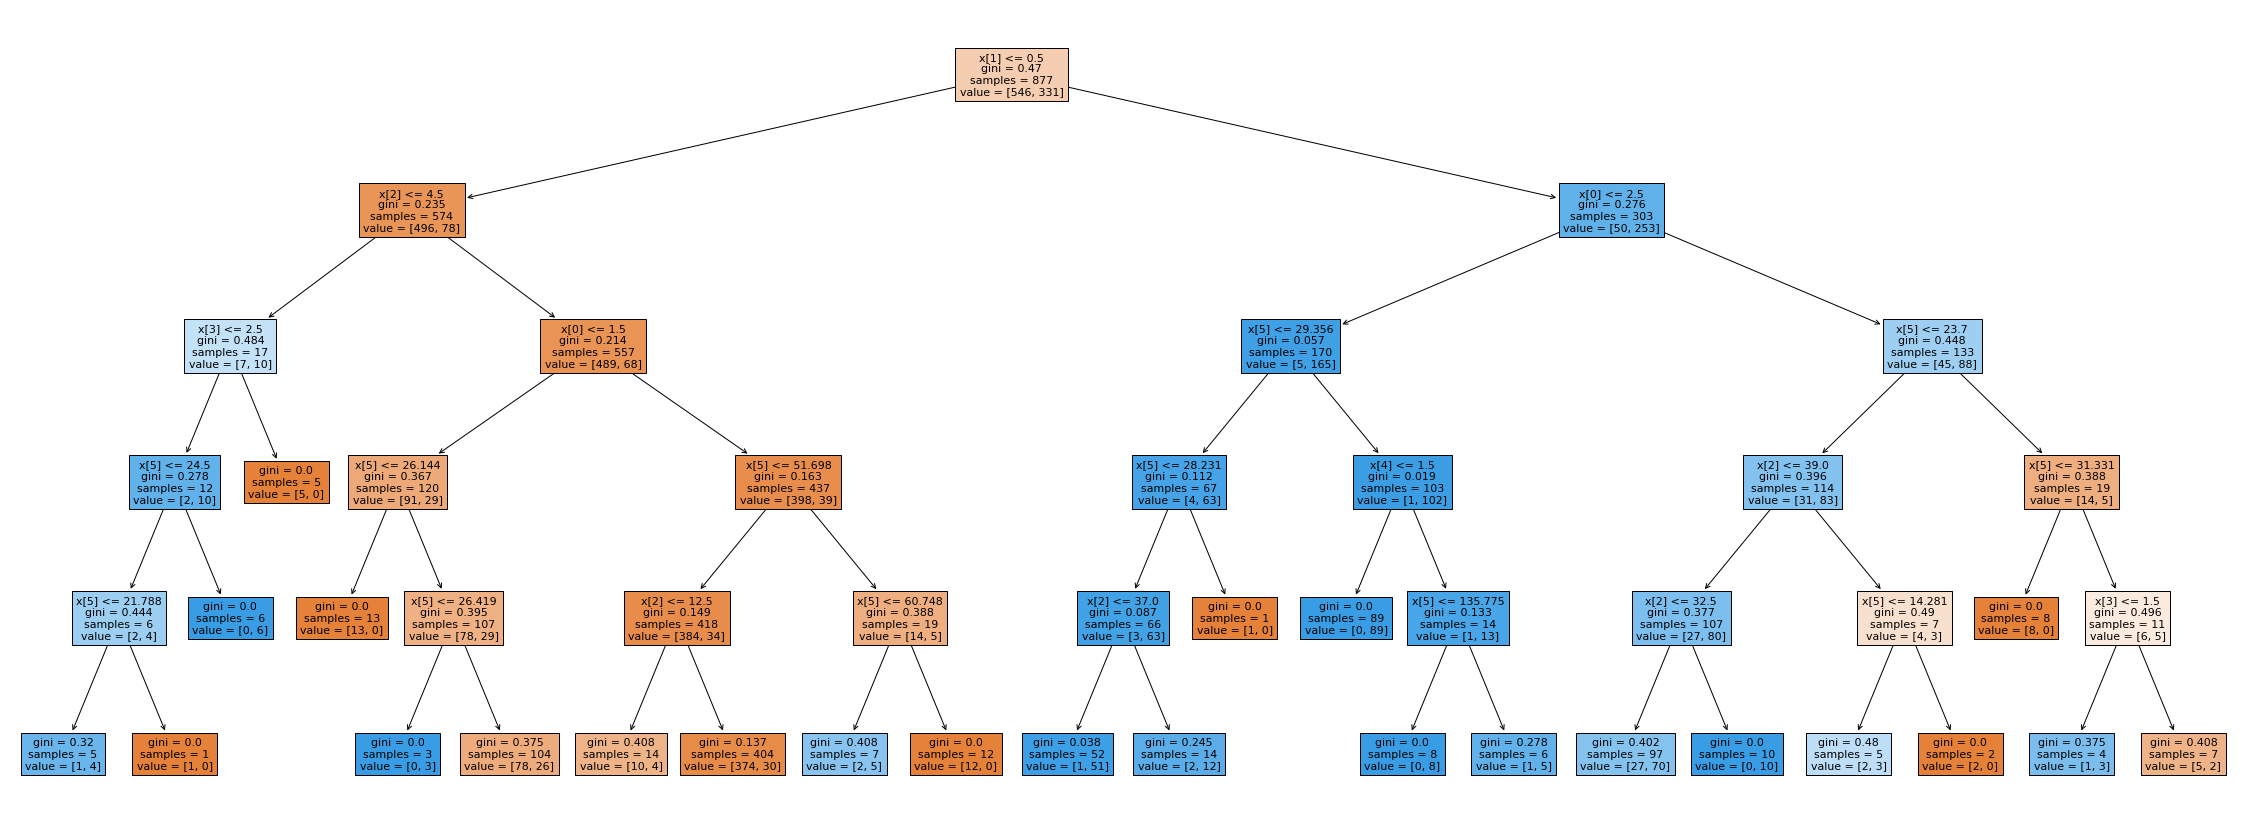

In [28]:
from sklearn import tree
plt.figure(figsize=(40,15))
tree.plot_tree(model, filled=True)
plt.show()

In [19]:
#USING Grid SearchCv TO CHECK WHICH HYPERPARAMETER FOR MAX_DEPTH IS MORE USEFUL IN THIS SCENARIO
from sklearn.model_selection import GridSearchCV
parameters = { 'max_depth': [3, 4, 5, 6, 7, 8] }

grid_search = GridSearchCV(estimator=model, param_grid = parameters)
grid_search.fit(X_train, y_train)

#SHOWING BEST PARAMETER (POST PRUNNING)
grid_search.best_params_

{'max_depth': 5}